# IMPORTING LIBRARIES

In [14]:
#Importing libraries for data cleaning, processing and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express  as px
import time
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# READING THE DATA

In [2]:
df=pd.read_csv('complaints_processed.csv')
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


# EXPLORATORY DATA ANALYSIS

**Pie chart showing the distribution of consumer complaints**

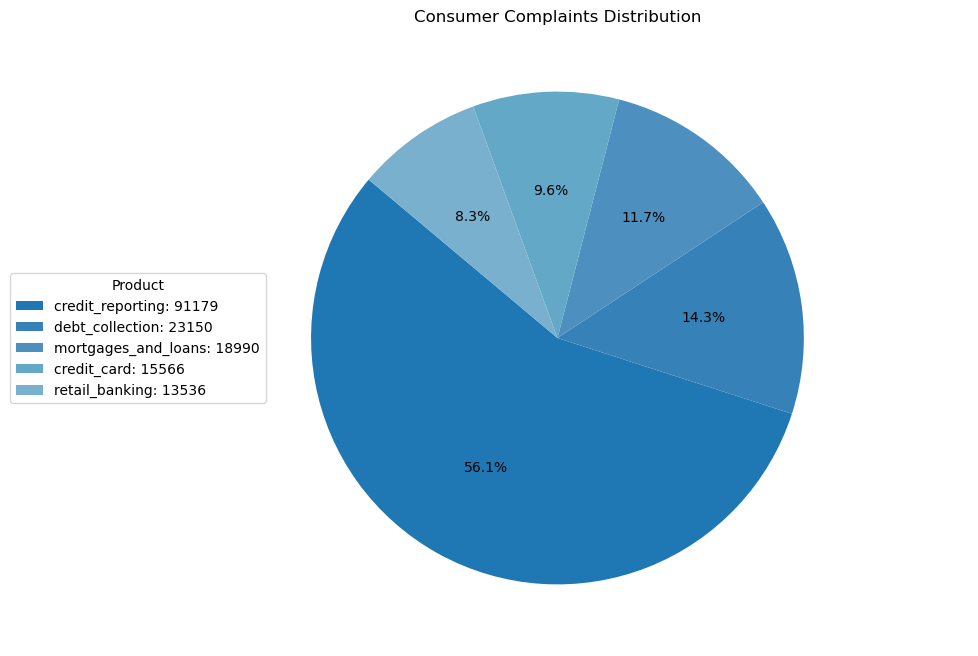

In [11]:
# Get the value counts for the 'product' column
product_counts = df['product'].value_counts()

# Set custom shades of blue
colors = ['#1f77b4', '#3581b8', '#4d8fbf', '#63a8c6', '#79b0cd']

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size (optional)
wedges, texts, _ = plt.pie(product_counts.values, labels=product_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Set the text in the center of each slice with the exact count
for text in texts:
    text.set_color('white')  # Setting text color to white
    text.set_fontsize(12)  # Setting text font size
    text.set_fontweight('bold')  # Setting text font weight

# Adding the count as legend on the left side
legend_labels = [f'{product}: {count}' for product, count in zip(product_counts.index, product_counts.values)]
plt.legend(wedges, legend_labels, title='Product', loc='center left', bbox_to_anchor=(-0.4, 0.5))

# Title
plt.title('Consumer Complaints Distribution')

# Displaying the plot
plt.show()

**Observation:**

- Consumer complaints are directed to five departments namely: credit reporting, debt collection, mortgages & loans, credit cards and retail banking. 
- Most of the consumer complaints are directed to credit reporting departing, it accounts to more than 50% of the consumer complaints. The class imbalance will be handled during feature engineering to ensure the robustness of the model. 
- Credit reporting is a department that gather and maintain information about individuals' credit activities and creditworthiness. 

**A bar graph showing the distribution of word count for each deprtment consumer complaint.**

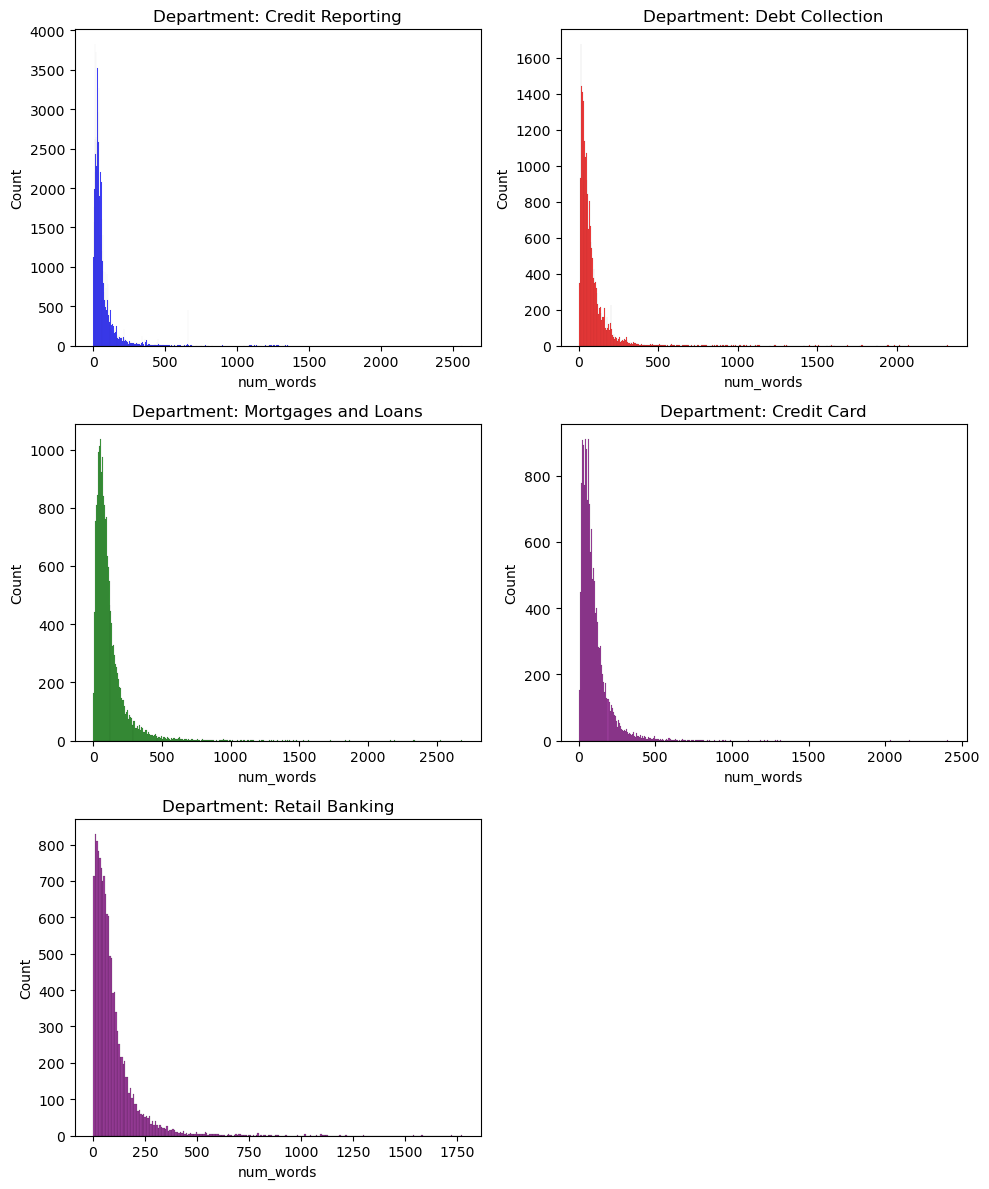

In [20]:
#Changing the narrative column to string
df['narrative']=df['narrative'].astype(str)

#Creating a number of Words feature
df['num_words']=df['narrative'].apply(lambda x:len(nltk.word_tokenize(x)))

# Creating a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Plot histogram for  'credict_reporting'
sns.histplot(df[df['product'] == 'credit_reporting']['num_words'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Department: Credit Reporting')

# Plotting histogram for 'debt_collection'
sns.histplot(df[df['product'] == 'debt_collection']['num_words'], ax=axes[0, 1], color='red')
axes[0, 1].set_title('Department: Debt Collection')

# Plotting histogram for  'mortgages_and_loans'
sns.histplot(df[df['product'] == 'mortgages_and_loans']['num_words'], ax=axes[1, 0], color='green')
axes[1, 0].set_title('Department: Mortgages and Loans')

# Plotting histogram for'credit_card'
sns.histplot(df[df['product'] == 'credit_card']['num_words'], ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Department: Credit Card')

# Plotting histogram for 'retail_banking'
sns.histplot(df[df['product'] == 'retail_banking']['num_words'], ax=axes[2, 0], color='purple')
axes[2, 0].set_title('Department: Retail Banking')

# An empty subplot for spacing
axes[2, 1].axis('off')

# Adjusting the spacing between subplots
plt.tight_layout()

# Showingthe subplots
plt.show()
